### Load libraries

In [1]:
import geopandas as geopd
import pandas as pd

- `import geopandas as geopd`: This line imports the geopandas library and assigns it the alias `geopd`. GeoPandas is used to handle geospatial data in Python.
- `import pandas as pd`: This line imports the pandas library and assigns it the alias `pd`. Pandas is used for data manipulation and analysis.

### Load Mexico shape file  
Source: Marco Geoestadístico INEGI (2023).
#### URL: https://www.inegi.org.mx/temas/mg/ 

In [2]:
# INEGI data
gdf = geopd.read_file("../dataset/Mexico/geometry/2023_1_00_MUN/2023_1_00_MUN.shp")

- `INEGI data`: This comment indicates that the following code deals with data from INEGI (Instituto Nacional de Estadística y Geografía), Mexico's National Institute of Statistics and Geography.
- `gdf = geopd.read_file("../dataset/Mexico/geometry/2023_1_00_MUN/2023_1_00_MUN.shp")`: This line reads a shapefile using GeoPandas. The file path points to the shapefile on the disk, which contains geographic data for Mexico's municipalities. The read file is stored in the variable gdf as a GeoDataFrame, which supports spatial operations.

### Display data frame entries

- `CVEGEO`: The CVEGEO is a unique geo-statistical code assigned by INEGI. This code is used to uniquely identify geographic areas for statistical purposes, enabling precise data collection and analysis across different regions in Mexico. The CVEGEO ensures consistency in identifying locations within national ../datasets, making it a vital tool for researchers, planners, and policymakers in understanding and managing spatial data.
- `CVE_ENT`: The CVE_ENT is the state code provided by INEGI. This code is a numeric identifier assigned to each of the 32 states in Mexico, facilitating the organization and retrieval of state-level data in geographic and statistical analyses. The CVE_ENT code ensures uniformity and accuracy in identifying states within national and regional ../datasets, supporting effective governance, resource allocation, and planning at the state level.
- `CVE_MUN`: The CVE_MUN is the municipality code provided by INEGI. Each of the over 2,400 municipalities in Mexico is assigned a unique CVE_MUN code, which helps in distinguishing and managing data specific to each municipality. This code is essential for precise data collection, analysis, and governance within the broader framework of state and national statistics. The CVE_MUN code supports local government operations, demographic studies, and the implementation of public policies at the municipal level.
- `NOMGEO`: The NOMGEO represents the municipality name as provided by INEGI. This is the official name of the municipality, used in conjunction with its unique codes to provide a human-readable identifier for geographic and statistical records. The NOMGEO is crucial for data interpretation and reporting, helping to locate and identify specific municipalities within the broader context of state and national statistics. It facilitates communication, documentation, and the implementation of programs and services tailored to local needs.
- `geometry`: The geometry attribute contains the boundary information of each municipality as defined by INEGI. This information is typically represented as polygons, which outline the geographic area of the municipality. These polygons are essential for spatial analyses, mapping, and visualizations, as they define the physical extents of each municipality. The geometry data is used in geographic information systems (GIS) to overlay different data layers, analyze spatial relationships, and create detailed maps for various applications, including urban planning, environmental management, and infrastructure development.

In [3]:
display(gdf)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01008,01,008,San José de Gracia,"POLYGON ((-102.45537 22.31212, -102.45501 22.3..."
1,01009,01,009,Tepezalá,"POLYGON ((-102.17738 22.36243, -102.17968 22.3..."
2,01007,01,007,Rincón de Romos,"POLYGON ((-102.22684 22.37393, -102.22661 22.3..."
3,01006,01,006,Pabellón de Arteaga,"POLYGON ((-102.25345 22.18302, -102.25130 22.1..."
4,01005,01,005,Jesús María,"POLYGON ((-102.35391 22.06255, -102.35312 22.0..."
...,...,...,...,...,...
2470,32029,32,029,Miguel Auza,"POLYGON ((-103.43211 24.35769, -103.43133 24.3..."
2471,32028,32,028,Mezquital del Oro,"POLYGON ((-103.28714 21.34599, -103.28698 21.3..."
2472,32011,32,011,Trinidad García de la Cadena,"POLYGON ((-103.43530 21.32920, -103.43494 21.3..."
2473,32027,32,027,Melchor Ocampo,"POLYGON ((-102.29548 25.12519, -102.26655 25.1..."


- `display(gdf)`: This line displays the GeoDataFrame gdf. In a Jupyter notebook, this will render the GeoDataFrame as a table, showing its contents and structure.

### Stationary pollution sources. Display data frame entries. Source DENUE-INEGI.
#### URL: https://www.inegi.org.mx/app/mapa/denue/default.aspx

- `CVE_ENT`: The CVE_ENT is the state code provided by INEGI. This numeric identifier is assigned to each of the 32 states in Mexico. The cve_ent code is used to organize, retrieve, and analyze state-level data efficiently, facilitating geographic and statistical studies across the country. It ensures consistency and accuracy in identifying and managing data specific to each state.
- `NOMENT`: The NOMENT represents the municipality name as provided by INEGI. This is the official name of the municipality and is used in conjunction with its unique codes to provide a human-readable identifier for geographic and statistical records. The nom_ent is crucial for data interpretation and reporting, helping to locate and identify specific municipalities within the broader context of state and national statistics.
- `ACTIVIDAD`: The ACTIVIDAD attribute describes the type of industrial activity occurring at a specific location. This can include a wide range of activities such as manufacturing, processing, production, and other industrial operations. The actividad data is essential for understanding the economic landscape of a region, identifying the types of industries present, and assessing their potential impact on the environment and local communities.
- `CVE_MUN`: The CVE_MUN is the municipality code provided by INEGI. Each municipality within a state is assigned a unique CVE_MUN code, which is used to distinguish and manage data specific to municipalities within the broader context of state and national statistics.
- `geometry`: The geometry attribute contains the geographical coordinates, specifically the longitude and latitude, of a given location. These coordinates define the precise physical position of a point on the Earth's surface. In the context of pollution sources, the geometry data allows for the accurate mapping and spatial analysis of stationary pollution sources, facilitating the study of their distribution, proximity to populated areas, and potential environmental impact. The use of geographic coordinates ensures that the location data is precise and can be integrated into geographic information systems for further analysis and visualization.

In [4]:
# Plot Mexico's map labeling each state by a color. 

df = pd.read_csv("../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")

gdf_stationary_pullution_sources = geopd.GeoDataFrame(
    df, geometry=geopd.points_from_xy(df.X,df.Y, crs="epsg:4326",
))

display(gdf_stationary_pullution_sources)


,id,cve_ent,nom_ent,actividad,X,Y,Unnamed: 6,geometry
0,FQ1,24,San Luis Potosí,Fabricacion de Quimicos,-100.876628,22.102930,NaN,POINT (-100.87663 22.10293)
1,FQ2,24,San Luis Potosí,Fabricacion de Quimicos,-100.992320,22.166703,NaN,POINT (-100.99232 22.16670)
2,FQ3,24,San Luis Potosí,Fabricacion de Quimicos,-100.879019,22.069436,NaN,POINT (-100.87902 22.06944)
3,FQ4,24,San Luis Potosí,Fabricacion de Quimicos,-100.893507,22.061079,NaN,POINT (-100.89351 22.06108)
4,FQ5,24,San Luis Potosí,Fabricacion de Quimicos,-100.882499,22.071247,NaN,POINT (-100.88250 22.07125)
...,...,...,...,...,...,...,...,...
1830,L4048410,28,Tamaulipas,Ladrillera,-98.293578,26.105376,NaN,POINT (-98.29358 26.10538)
1831,L4116771,28,Tamaulipas,Ladrillera,-98.274972,26.108096,NaN,POINT (-98.27497 26.10810)
1832,L9041195,28,Tamaulipas,Ladrillera,-98.271700,26.034586,NaN,POINT (-98.27170 26.03459)
1833,L4048400,28,Tamaulipas,Ladrillera,-98.283778,26.108146,NaN,POINT (-98.28378 26.10815)


- `df = pd.read_csv("../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")`: This line reads a CSV file containing data on stationary pollution sources into a pandas DataFrame df. The file path points to the location of the CSV file on the disk.
- `gdf_stationary_pullution_sources = geopd.GeoDataFrame(df, geometry=geopd.points_from_xy(df.X, df.Y, crs="epsg:4326"))`: This line creates a GeoDataFrame `gdf_stationary_pullution_sources` from the DataFrame df. The geometry parameter is used to create point geometries from the X and Y columns, which contain the longitude and latitude coordinates. The crs="epsg:4326" parameter sets the coordinate reference system to WGS 84, the most commonly used geographic coordinate system.
- `display(gdf_stationary_pullution_sources)`: This line displays the GeoDataFrame `gdf_stationary_pullution_sources`. In a Jupyter notebook, this will render the GeoDataFrame as a table, showing its contents and structure.

### Plot stationary pollution sources

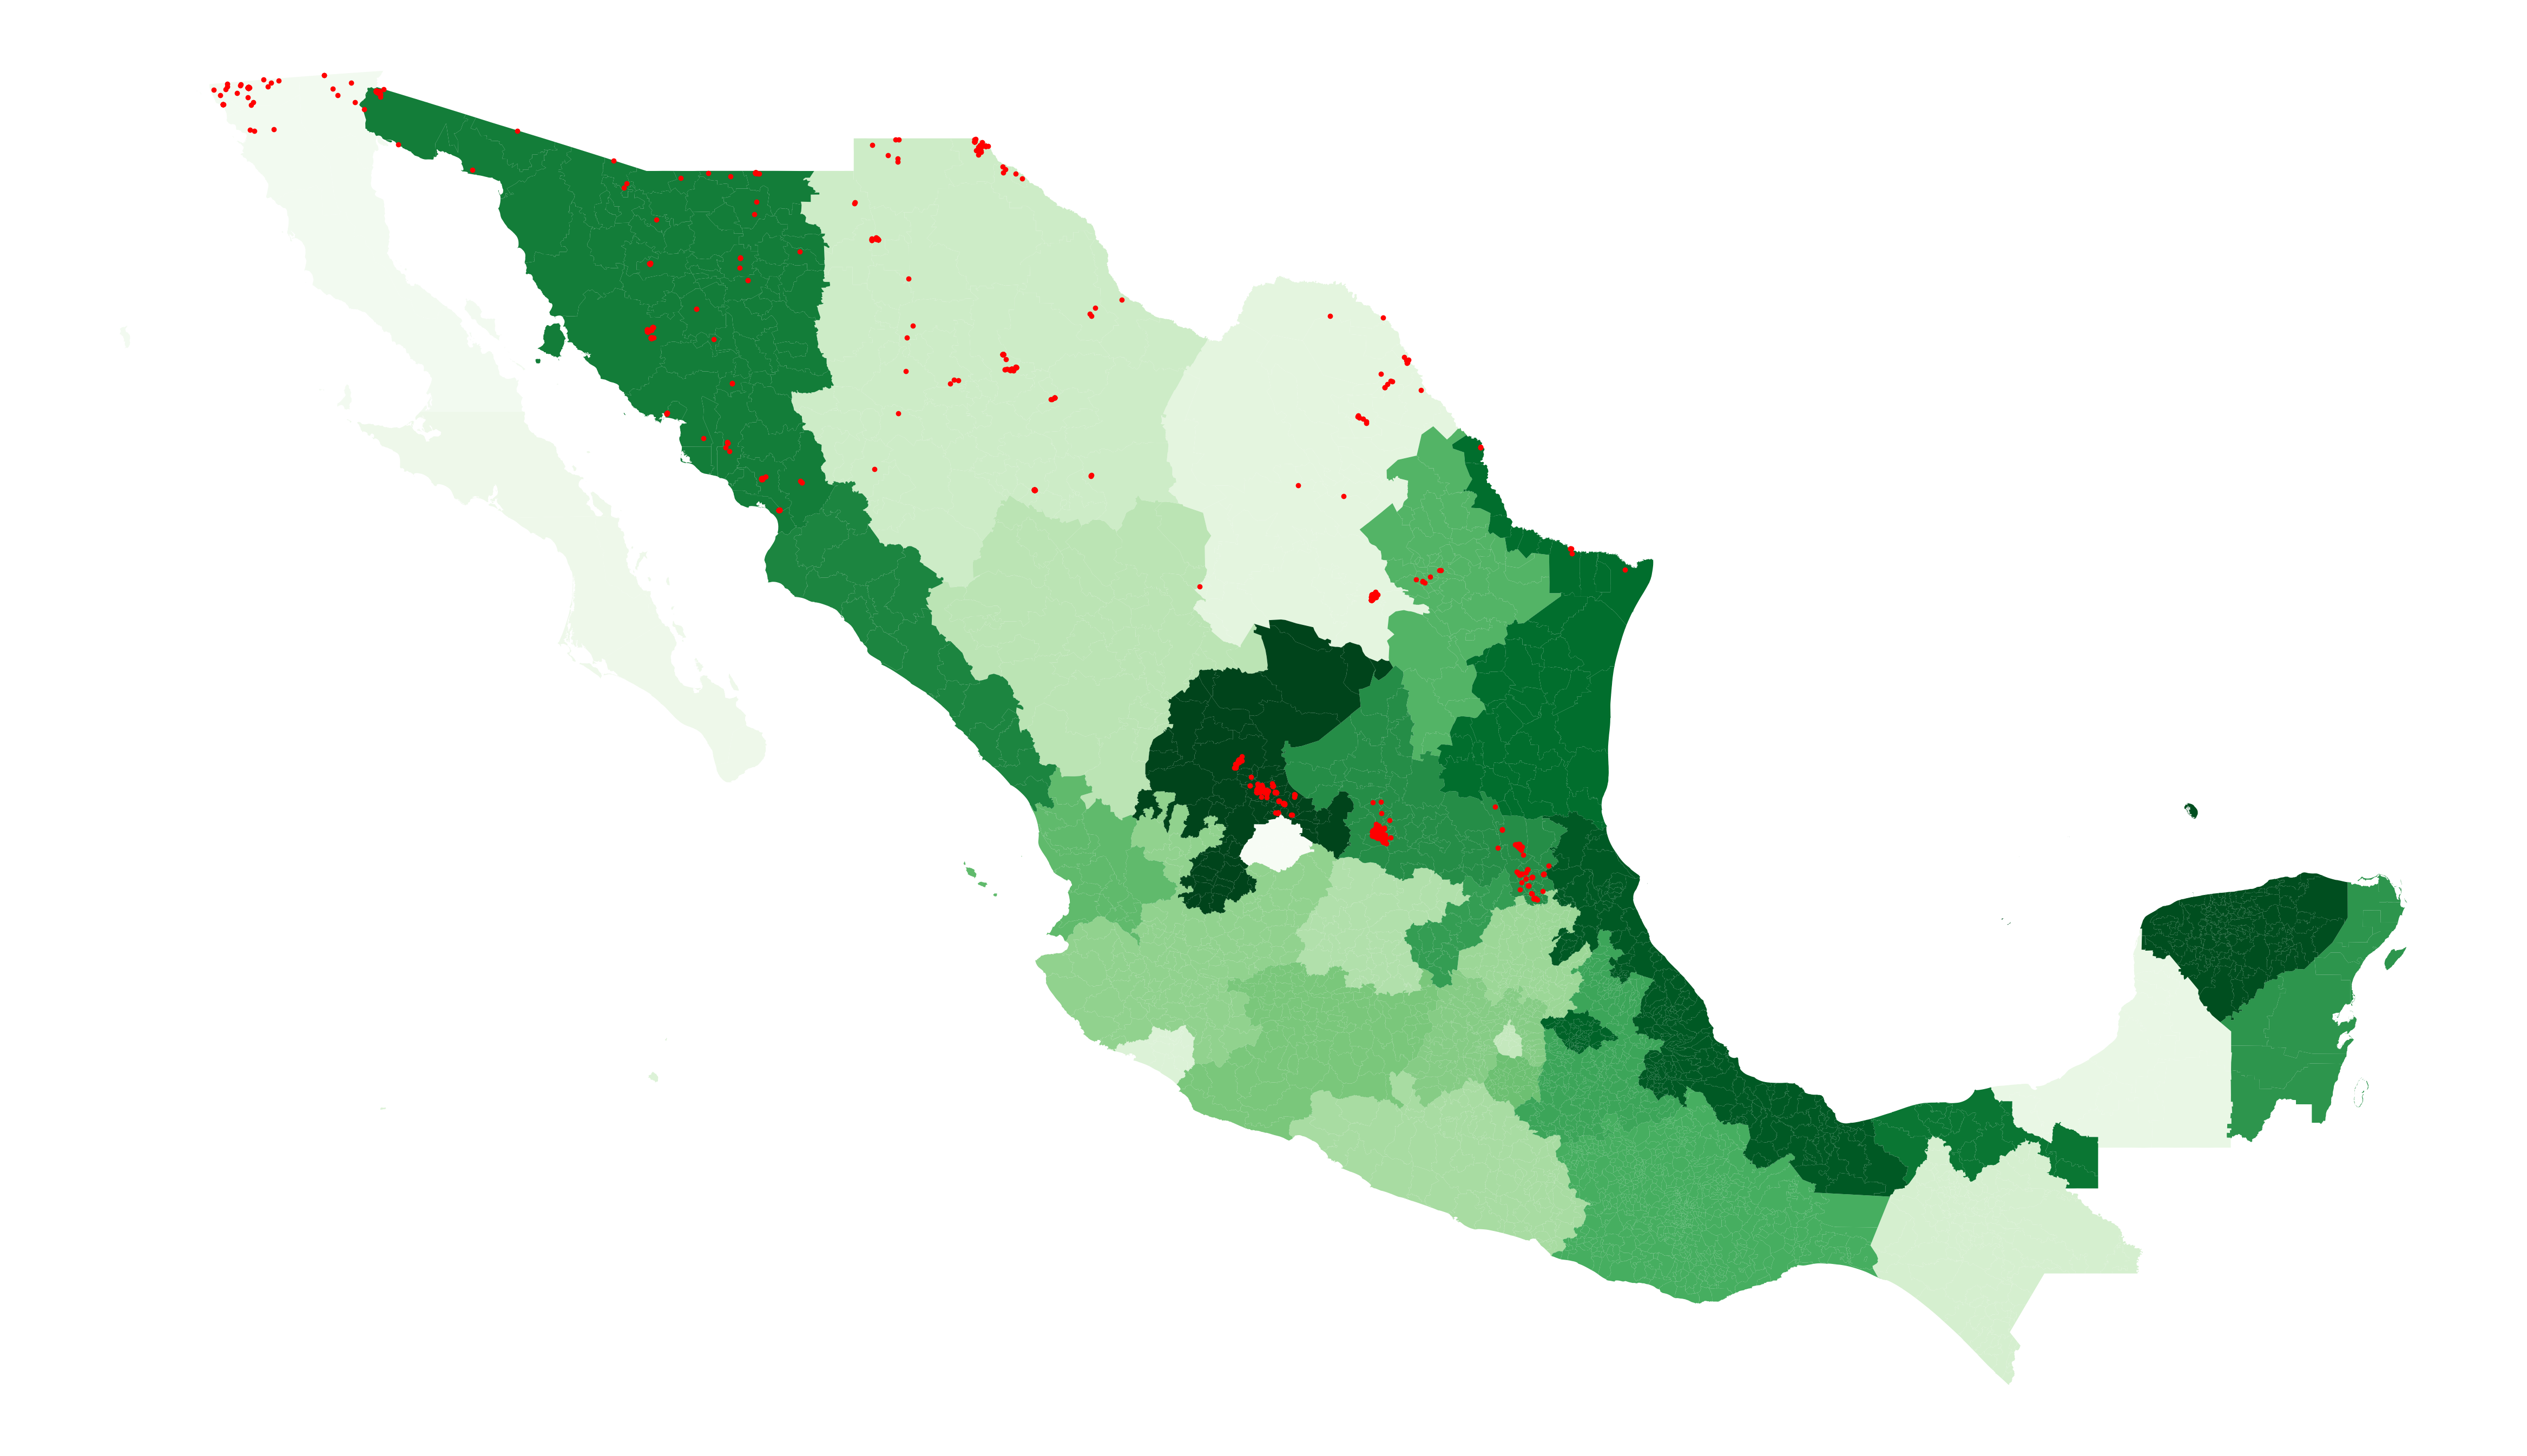

In [5]:
ax = gdf.plot(figsize = (60, 60),column="CVE_ENT",cmap="Greens")

gdf_stationary_pullution_sources.plot(ax=ax,figsize = (60, 60),aspect=1, color="red")
ax.set_axis_off()

- `ax = gdf.plot(figsize = (60, 60), column="CVE_ENT", cmap="Greens")`: This line creates a plot of the GeoDataFrame gdf. The figsize = (60, 60) parameter sets the size of the plot. The column="CVE_ENT" parameter specifies that the states should be colored according to their CVE_ENT code. The cmap="Greens" parameter sets the color map to "Greens".
- `gdf_stationary_pullution_sources.plot(ax=ax, figsize = (60, 60), aspect=1, color="red")`: This line adds the stationary pollution sources to the existing plot, with the points colored in red. The aspect=1 parameter ensures that the aspect ratio of the plot is maintained.
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.